In [35]:
!pip install tensorflow

In [4]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 102 kB/s  eta 0:00:01
     |████████████████████████████████| 46 kB 416 kB/s  eta 0:00:01


In [5]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 199 kB 23.4 MB/s eta 0:00:01


In [37]:
#importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras

## Data Preprocessing & Profiling

In [38]:
#previewing the data
df = pd.read_csv('employee_data.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [39]:
#drop rows that contain empty/nan values
df.dropna()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [40]:
#preview initial data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [41]:
#drop redundant and irrelevant columns

dropped = ['DailyRate','EmployeeCount','EmployeeNumber','JobLevel','MonthlyIncome','MonthlyRate','Over18','StandardHours','StockOptionLevel','TrainingTimesLastYear','YearsWithCurrManager']
df.drop(dropped,axis=1,inplace=True)

In [42]:
#profile the data

for column in df:
    print(f'{column} : {df[column].unique()}')

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EnvironmentSatisfaction : [2 3 4 1]
Gender : ['Female' 'Male']
HourlyRate : [ 94  61  92  56  40  79  81  67  44  84  49  31  93  50  51  80  96  78
  45  82  53  83  58  72  48  42  41  86  97  75  33  37  73  98  36  47
  71  30  43  99  59  95  57  76  87  66  55  32  52  70  62  64  63  60
 100  46  39  77  35  91  54  34  90  65  88  85  89  68  69  74  38]
JobInvolvement : [3 2 4 1]
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 

In [43]:
#a function that prints the unique values for columns that have an 'object' data type
def print_unique_col_values(df):
    
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [44]:
#preview of object columns unique values
print_unique_col_values(df)

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [45]:
#encode columns with 'yes' & 'no' values as 1 & 0 respectively
yes_no_columns = ['Attrition','OverTime']

for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0}, inplace=True)

In [46]:
#encode columns with 'female' & 'male' values as 1 & 0 respectively
df['Gender'].replace({'Female':1, 'Male':0},inplace=True)

In [47]:
#encode numerical rating 1,2,3,& 4 with categorical purpose to categorical values such as 'low','medium','high', & 'very high' respectively
rating_columns = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']

for col in rating_columns:
    df[col].replace({1:'Low',2:'Medium',3:'High',4:'Very High'}, inplace=True)

In [48]:
#using one hot encoding to transform categorical values into numerical representation
OneHotColumns = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']

OneHotData = pd.get_dummies(data=df, columns=OneHotColumns)
OneHotData

,Age,Attrition,DistanceFromHome,Education,Gender,HourlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,...,PerformanceRating_High,PerformanceRating_Very High,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_High,WorkLifeBalance_Low,WorkLifeBalance_Medium,WorkLifeBalance_Very High
0,41,1,1,2,1,94,8,1,11,8,...,1,0,0,1,0,0,0,1,0,0
1,49,0,8,1,0,61,1,0,23,10,...,0,1,0,0,0,1,1,0,0,0
2,37,1,2,2,0,92,6,1,15,7,...,1,0,0,0,1,0,1,0,0,0
3,33,0,3,4,1,56,1,1,11,8,...,1,0,1,0,0,0,1,0,0,0
4,27,0,2,1,0,40,9,0,12,6,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,0,41,4,0,17,17,...,1,0,1,0,0,0,1,0,0,0
1466,39,0,6,1,0,42,4,0,15,9,...,1,0,0,1,0,0,1,0,0,0
1467,27,0,4,3,0,87,1,1,20,6,...,0,1,0,0,1,0,1,0,0,0
1468,49,0,2,3,0,63,2,0,14,17,...,1,0,0,0,0,1,0,0,1,0


In [49]:
#verify if all data types are numerical
OneHotData.dtypes

Age                                   int64
Attrition                             int64
DistanceFromHome                      int64
Education                             int64
Gender                                int64
HourlyRate                            int64
NumCompaniesWorked                    int64
OverTime                              int64
PercentSalaryHike                     int64
TotalWorkingYears                     int64
YearsAtCompany                        int64
YearsInCurrentRole                    int64
YearsSinceLastPromotion               int64
BusinessTravel_Non-Travel             uint8
BusinessTravel_Travel_Frequently      uint8
BusinessTravel_Travel_Rarely          uint8
Department_Human Resources            uint8
Department_Research & Development     uint8
Department_Sales                      uint8
EducationField_Human Resources        uint8
EducationField_Life Sciences          uint8
EducationField_Marketing              uint8
EducationField_Medical          

In [50]:
#scale the data
cols_to_scale = ['Age','DistanceFromHome','HourlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']

scaler = MinMaxScaler()

OneHotData[cols_to_scale] = scaler.fit_transform(OneHotData[cols_to_scale])


In [51]:
OneHotData

,Age,Attrition,DistanceFromHome,Education,Gender,HourlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,...,PerformanceRating_High,PerformanceRating_Very High,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_High,WorkLifeBalance_Low,WorkLifeBalance_Medium,WorkLifeBalance_Very High
0,0.547619,1,0.000000,2,1,0.914286,0.888889,1,0.000000,0.200,...,1,0,0,1,0,0,0,1,0,0
1,0.738095,0,0.250000,1,0,0.442857,0.111111,0,0.857143,0.250,...,0,1,0,0,0,1,1,0,0,0
2,0.452381,1,0.035714,2,0,0.885714,0.666667,1,0.285714,0.175,...,1,0,0,0,1,0,1,0,0,0
3,0.357143,0,0.071429,4,1,0.371429,0.111111,1,0.000000,0.200,...,1,0,1,0,0,0,1,0,0,0
4,0.214286,0,0.035714,1,0,0.142857,1.000000,0,0.071429,0.150,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0,0.785714,2,0,0.157143,0.444444,0,0.428571,0.425,...,1,0,1,0,0,0,1,0,0,0
1466,0.500000,0,0.178571,1,0,0.171429,0.444444,0,0.285714,0.225,...,1,0,0,1,0,0,1,0,0,0
1467,0.214286,0,0.107143,3,0,0.814286,0.111111,1,0.642857,0.150,...,0,1,0,0,1,0,1,0,0,0
1468,0.738095,0,0.035714,3,0,0.471429,0.222222,0,0.214286,0.425,...,1,0,0,0,0,1,0,0,1,0


In [52]:
#preview scaled data
for column in OneHotData:
    print(f'{column} : {OneHotData[column].unique()}')

Age : [0.54761905 0.73809524 0.45238095 0.35714286 0.21428571 0.33333333
 0.97619048 0.28571429 0.47619048 0.42857143 0.4047619  0.26190476
 0.30952381 0.38095238 0.23809524 0.0952381  0.83333333 0.14285714
 0.07142857 0.57142857 0.61904762 0.66666667 0.5        0.5952381
 0.76190476 0.19047619 0.71428571 0.88095238 0.64285714 0.9047619
 0.11904762 0.78571429 0.52380952 0.85714286 0.95238095 0.04761905
 0.16666667 0.02380952 0.92857143 0.80952381 0.69047619 0.
 1.        ]
Attrition : [1 0]
DistanceFromHome : [0.         0.25       0.03571429 0.07142857 0.82142857 0.78571429
 0.92857143 0.53571429 0.5        0.89285714 0.64285714 0.71428571
 0.14285714 0.35714286 0.28571429 0.21428571 0.17857143 0.32142857
 0.10714286 0.85714286 0.39285714 0.60714286 1.         0.75
 0.46428571 0.67857143 0.96428571 0.57142857 0.42857143]
Education : [2 1 4 3 5]
Gender : [1 0]
HourlyRate : [0.91428571 0.44285714 0.88571429 0.37142857 0.14285714 0.7
 0.72857143 0.52857143 0.2        0.77142857 0.2714285

## Synthetic Minority Oversampling Technique (SMOTE)
### fixing skewed data

In [53]:
#splitting data from target variable
X = OneHotData.drop('Attrition',axis=1)
y = OneHotData['Attrition']

In [54]:
#preview target variable distribution prior to fix
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [55]:
#fixing unbalanced dataset by using SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

## Building Baseline Model

In [56]:
#splitting data

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=99,stratify=y_sm)

In [57]:
#build dummy classifier
classifier = DummyClassifier(strategy='most_frequent')
classifier.fit(X_train,y_train)

#estimate accuracy
pred = classifier.predict(X_test)
estimated_accuracy = accuracy_score(y_test,pred)
estimated_accuracy

0.5

## Building ANN Model

In [58]:
#determine how many neurons in the input layer
len(X_train.columns)

58

In [59]:
#build the model
model = keras.Sequential([
    keras.layers.Dense(50, input_shape=(58,),activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#train the model
model.fit(X_train,y_train,epochs=10)

#predictions
predictions = model.predict(X_test)
predictions = np.round(predictions)

#produce report
print("Classification Report: \n",classification_report(y_test, predictions))

2022-05-05 15:01:30.939275: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-05 15:01:30.939318: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-05 15:01:30.939347: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-ccaa639c-2db0b8-2d4f23-2db7be-2d9c9fcc269f47): /proc/driver/nvidia/version does not exist
2022-05-05 15:01:30.939686: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
62/62 [==============================] - 1s 1ms/step - loss: 0.6078 - accuracy: 0.6800
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8423
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.2922 - accuracy: 0.8910
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.2410 - accuracy: 0.9062
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.2151 - accuracy: 0.9123
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.1908 - accuracy: 0.9290
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.1659 - accuracy: 0.9386
Epoch 8/10
62/62 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9457
Epoch 9/10
62/62 [==============================] - 0s 1ms/step - loss: 0.1456 - accuracy: 0.9468
Epoch 10/10
62/62 [==============================] - 0s 1ms/step - loss: 0.1261 - accuracy: 0.9569
Classification Repo

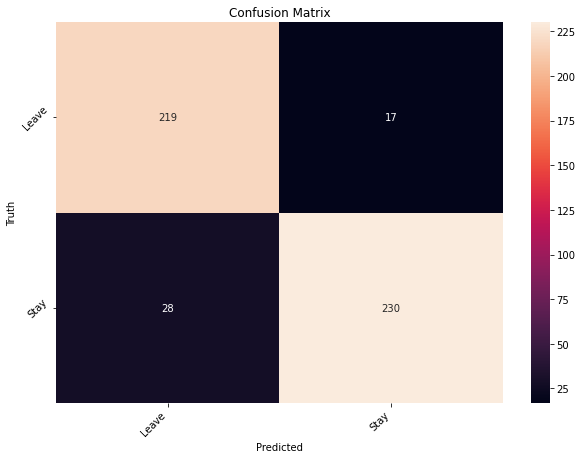

In [66]:
#create a confusion matrix

plt.figure(figsize=(10,7))
labels = ['Stay','Leave']
cm2 = confusion_matrix(predictions,y_test)
heatmap = sns.heatmap(cm2, annot=True, xticklabels=True, yticklabels=True,fmt='d')
heatmap.set_xticklabels(labels,rotation=45,horizontalalignment='right')
heatmap.set_yticklabels(labels,rotation=45,horizontalalignment='right') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
heatmap.invert_yaxis()
heatmap.invert_xaxis()

## Random Forest (Catboost)

In [115]:
#built a Catboost classifier for fun

from catboost import CatBoostClassifier, Pool

prep = Pool(data=X_train,
            label=y_train)

#build the model
model = CatBoostClassifier(iterations=500,  
                           depth=6,
                           loss_function='CrossEntropy',
                           use_best_model=True,
                           eval_metric='Accuracy',
                           od_type = 'Iter',
                           od_wait = 50,
                           random_state = 99
                           )
#train the model
model.fit(prep, eval_set=(X_test,y_test))

#predictions
predictionz = model.predict(X_test)

#determine accuracy
accuracy_score(y_test, predictionz)

0:	learn: 0.7190669	test: 0.7024291	best: 0.7024291 (0)	total: 3.57ms	remaining: 1.78s
1:	learn: 0.7682556	test: 0.7368421	best: 0.7368421 (1)	total: 6.16ms	remaining: 1.53s
2:	learn: 0.8027383	test: 0.7631579	best: 0.7631579 (2)	total: 8.72ms	remaining: 1.45s
3:	learn: 0.7961460	test: 0.7307692	best: 0.7631579 (2)	total: 11ms	remaining: 1.36s
4:	learn: 0.8103448	test: 0.7672065	best: 0.7672065 (4)	total: 13.2ms	remaining: 1.3s
5:	learn: 0.8215010	test: 0.7793522	best: 0.7793522 (5)	total: 15.5ms	remaining: 1.27s
6:	learn: 0.8260649	test: 0.7874494	best: 0.7874494 (6)	total: 17.7ms	remaining: 1.25s
7:	learn: 0.8240365	test: 0.7995951	best: 0.7995951 (7)	total: 20.4ms	remaining: 1.26s
8:	learn: 0.8245436	test: 0.7854251	best: 0.7995951 (7)	total: 22.7ms	remaining: 1.24s
9:	learn: 0.8336714	test: 0.7813765	best: 0.7995951 (7)	total: 24.9ms	remaining: 1.22s
10:	learn: 0.8336714	test: 0.7813765	best: 0.7995951 (7)	total: 27.1ms	remaining: 1.21s
11:	learn: 0.8382353	test: 0.7894737	best: 0.

0.9210526315789473

Text(69.0, 0.5, 'Truth')

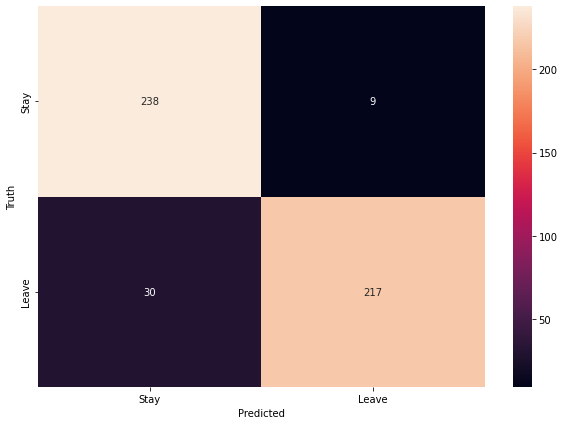

In [135]:
#generate confusion matrix for catboost

plt.figure(figsize=(10,7))
labels = ['Stay','Leave']
cm = confusion_matrix(y_test, predictionz)
heatmap = sns.heatmap(cm, annot=True,fmt='g')
heatmap.set_xticklabels(labels) 
heatmap.set_yticklabels(labels) 
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Building Clustering Model for Employee That Left

Text(0, 0.5, 'DistanceFromHome')

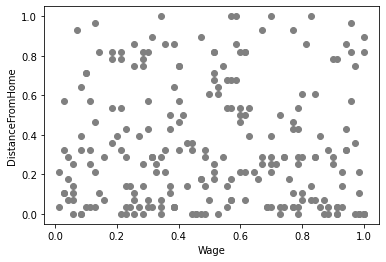

In [42]:
#preview scatter plot of age vs wage for employee that left the company prior to clustering
LeaveClustData = OneHotData.loc[df['Attrition'] == 1,['HourlyRate','DistanceFromHome']]

plt.scatter(LeaveClustData['HourlyRate'],LeaveClustData['DistanceFromHome'], color='gray')
plt.xlabel('Wage')
plt.ylabel('DistanceFromHome')

Text(0, 0.5, 'inertia (WSS)')

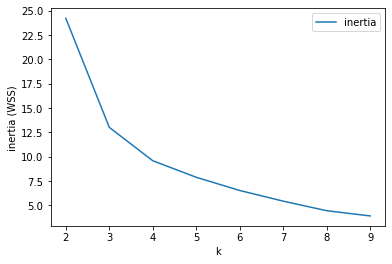

In [43]:
# Plot the elbow chart to determine the best k value
inertia_list = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(LeaveClustData)
    cluster_id = pd.Series(model.predict(LeaveClustData))
    inertia_list.append({'k':k, 'inertia':model.inertia_})

ax = pd.DataFrame(inertia_list).set_index('k').plot.line()
ax.set_ylabel('inertia (WSS)')

In [46]:
#build the model
km = KMeans(n_clusters=4)

#predict the group that each set of data belongs to
y_predicted = km.fit_predict(LeaveClustData)

LeaveClustData['Group'] = y_predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


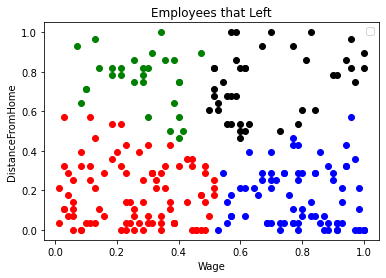

In [52]:
#clustering results
Clust1 = LeaveClustData[LeaveClustData['Group']==0]
Clust2 = LeaveClustData[LeaveClustData['Group']==1]
Clust3 = LeaveClustData[LeaveClustData['Group']==2]
Clust4 = LeaveClustData[LeaveClustData['Group']==3]

#display the clusters
plt.scatter(Clust1['HourlyRate'],Clust1['DistanceFromHome'],color='red')
plt.scatter(Clust2['HourlyRate'],Clust2['DistanceFromHome'],color='green')
plt.scatter(Clust3['HourlyRate'],Clust3['DistanceFromHome'],color='blue')
plt.scatter(Clust4['HourlyRate'],Clust4['DistanceFromHome'],color='black')

#adjust chart settings
plt.title("Employees that Left")
plt.xlabel('Wage')
plt.ylabel('DistanceFromHome')
plt.legend()

## Building Clustering Model for Employee That Stayed

Text(0, 0.5, 'DistanceFromHome')

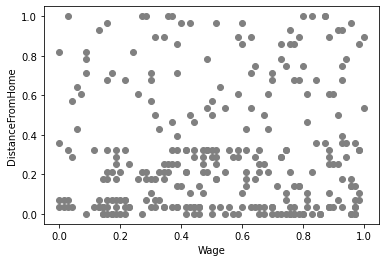

In [48]:
#preview scatter plot of age vs wage for employee that left the company prior to clustering
StayClustData = OneHotData.loc[df['Attrition'] == 0,['HourlyRate','DistanceFromHome']]
StayClustData = StayClustData.sample(n=300,random_state=99) ## undersample the employees that stayed to balance the dataset

plt.scatter(StayClustData['HourlyRate'],StayClustData['DistanceFromHome'], color='gray')
plt.xlabel('Wage')
plt.ylabel('DistanceFromHome')

Text(0, 0.5, 'inertia (WSS)')

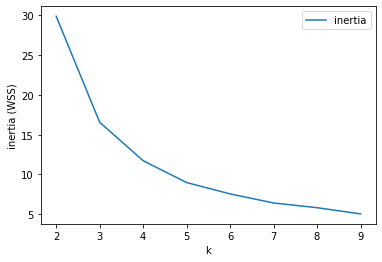

In [49]:
# Plot the elbow chart
inertia_list = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(StayClustData)
    cluster_id = pd.Series(model.predict(StayClustData))
    inertia_list.append({'k':k, 'inertia':model.inertia_})

ax = pd.DataFrame(inertia_list).set_index('k').plot.line()
ax.set_ylabel('inertia (WSS)')

In [50]:
#build the model
km = KMeans(n_clusters=4)

#predict the group that each set of data belongs to
y_predicted = km.fit_predict(StayClustData)

StayClustData['Group'] = y_predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


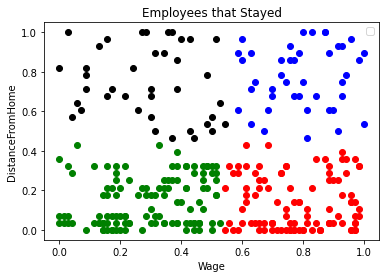

In [54]:
#clustering results
Clust1 = StayClustData[StayClustData['Group']==0]
Clust2 = StayClustData[StayClustData['Group']==1]
Clust3 = StayClustData[StayClustData['Group']==2]
Clust4 = StayClustData[StayClustData['Group']==3]

#display the clusters
plt.scatter(Clust1['HourlyRate'],Clust1['DistanceFromHome'],color='red')
plt.scatter(Clust2['HourlyRate'],Clust2['DistanceFromHome'],color='green')
plt.scatter(Clust3['HourlyRate'],Clust3['DistanceFromHome'],color='blue')
plt.scatter(Clust4['HourlyRate'],Clust4['DistanceFromHome'],color='black')

#adjust chart settings
plt.title("Employees that Stayed")
plt.xlabel('Wage')
plt.ylabel('DistanceFromHome')
plt.legend()